In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import timezone
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
data1 = pd.read_csv("equinix_Dell_channel1_20170718.csv")
df1 = pd.DataFrame(data1)
df1.shape

(85867, 6)

In [4]:
format = "%Y-%m-%d %H:%M:%S"
UTC=df1["occurred_at"]
def ist(t):
    UTC = datetime.strptime(str(t), format)
    UTC=UTC.replace(tzinfo=timezone('UTC'))
    IST = UTC.astimezone(timezone('Asia/Kolkata'))
    return IST.strftime(format)
IST=[]
for i in UTC:
    IST.append(ist(i))

In [5]:
df1['IST']=IST

df1.head()

df1.IST.values

array(['2019-07-18 00:00:00', '2019-07-18 00:00:01',
       '2019-07-18 00:00:02', ..., '2019-07-18 23:59:56',
       '2019-07-18 23:59:57', '2019-07-18 23:59:59'], dtype=object)

In [6]:
data4 = pd.read_csv("equinix_Dell_channel4_20170718.csv")
df4 = pd.DataFrame(data4)
df4.shape

(85867, 6)

In [7]:
format = "%Y-%m-%d %H:%M:%S"
UTC=df4["occurred_at"]
def ist(t):
    UTC = datetime.strptime(str(t), format)
    UTC=UTC.replace(tzinfo=timezone('UTC'))
    IST = UTC.astimezone(timezone('Asia/Kolkata'))
    return IST.strftime(format)
IST=[]
for i in UTC:
    IST.append(ist(i))

In [8]:
df4['IST']=IST

df4.IST.values

df4.dtypes

occurred_at      object
voltage         float64
current         float64
power           float64
power_factor      int64
frequency       float64
IST              object
dtype: object

In [9]:
df4 = df4.drop(["occurred_at","power_factor","frequency"], axis=1)

In [10]:
df4.rename(columns= {"voltage": "voltage4", 
                     "current":"current4","power":"power4"}, 
                                 inplace = True) 

In [11]:
data=pd.merge(df1,df4, on='IST', how='inner')
data.head()

,occurred_at,voltage,current,power,power_factor,frequency,IST,voltage4,current4,power4
0,2019-07-17 18:30:00,119.62,0.609,72.55,1,59.5,2019-07-18 00:00:00,119.62,0.725,86.51
1,2019-07-17 18:30:01,119.62,0.608,72.50,1,59.6,2019-07-18 00:00:01,119.62,0.725,86.48
2,2019-07-17 18:30:02,119.61,0.610,72.81,1,59.9,2019-07-18 00:00:02,119.61,0.728,86.76
3,2019-07-17 18:30:03,119.63,0.610,72.73,1,60.1,2019-07-18 00:00:03,119.63,0.727,86.69
4,2019-07-17 18:30:04,119.69,0.611,72.87,1,60.3,2019-07-18 00:00:04,119.69,0.728,86.83


In [12]:
data.isnull().sum()

occurred_at     0
voltage         0
current         0
power           0
power_factor    0
frequency       0
IST             0
voltage4        0
current4        0
power4          0
dtype: int64

In [13]:
data['current'] = data.apply(lambda x: x['current'] + x['current4'], axis=1)
data['power'] = data.apply(lambda x: x['power'] + x['power4'], axis=1)
data['voltage'] = data.apply(lambda x: (x['voltage'] + x['voltage4'])/2, axis=1)

In [14]:
data = data.drop(["occurred_at","current4","power4","voltage4"], axis=1)
data.head()

,voltage,current,power,power_factor,frequency,IST
0,119.62,1.334,159.06,1,59.5,2019-07-18 00:00:00
1,119.62,1.333,158.98,1,59.6,2019-07-18 00:00:01
2,119.61,1.338,159.57,1,59.9,2019-07-18 00:00:02
3,119.63,1.337,159.42,1,60.1,2019-07-18 00:00:03
4,119.69,1.339,159.70,1,60.3,2019-07-18 00:00:04


In [15]:
data = data.reindex(columns=['IST','voltage','current','power','power_factor','frequency'])

In [16]:
data.head()

,IST,voltage,current,power,power_factor,frequency
0,2019-07-18 00:00:00,119.62,1.334,159.06,1,59.5
1,2019-07-18 00:00:01,119.62,1.333,158.98,1,59.6
2,2019-07-18 00:00:02,119.61,1.338,159.57,1,59.9
3,2019-07-18 00:00:03,119.63,1.337,159.42,1,60.1
4,2019-07-18 00:00:04,119.69,1.339,159.70,1,60.3


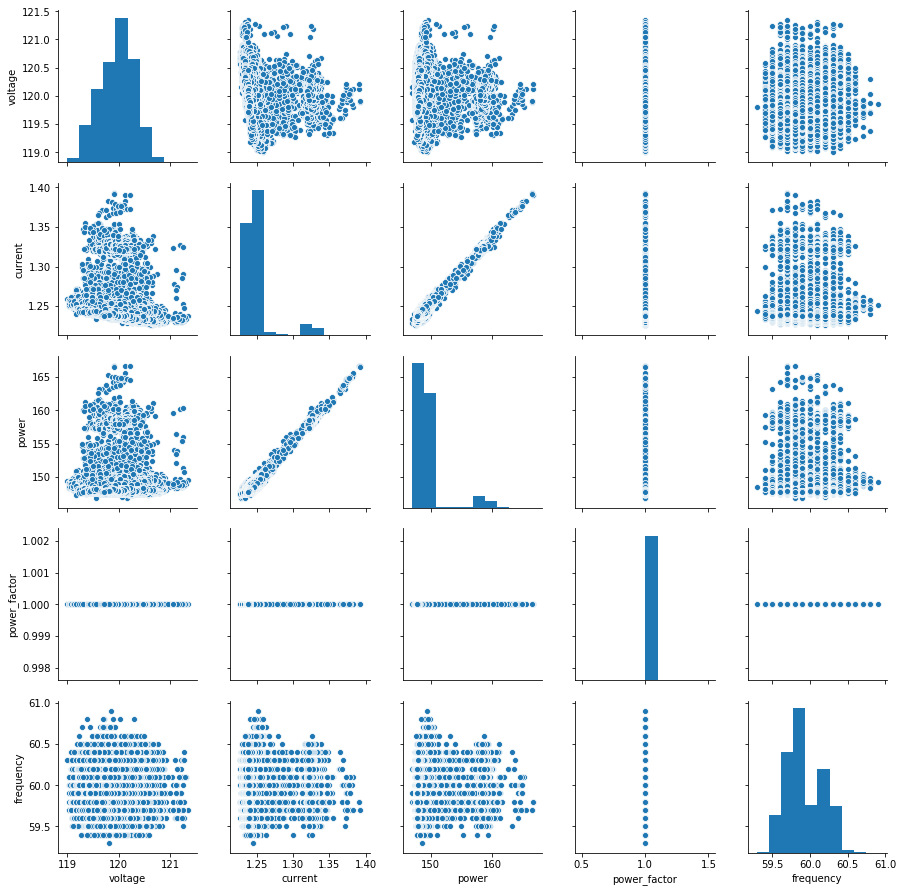

In [17]:
import seaborn as sb
sb.pairplot(data)

In [18]:
datad=data.describe()

datad=pd.DataFrame(datad)

datad.to_csv(r'summary/InitialDataSummary.csv')

datad

,voltage,current,power,power_factor,frequency
count,85883.000000,85883.00000,85883.000000,85883.0,85883.000000
mean,119.967625,1.24966,149.392563,1.0,59.913915
std,0.328330,0.02102,2.519821,0.0,0.230653
min,119.000000,1.22600,146.930000,1.0,59.300000
25%,119.740000,1.23900,148.120000,1.0,59.700000
50%,120.000000,1.24500,148.860000,1.0,59.900000
75%,120.200000,1.25100,149.430000,1.0,60.100000
max,121.340000,1.39300,166.710000,1.0,60.900000


In [19]:
py=data[(data['IST'] >= '2019-07-18 15:02:00') & (data['IST'] <= '2019-07-18 15:35:59')]

pyd=py.describe()

pyd=pd.DataFrame(pyd)

pyd.to_csv(r'summary/PySummary.csv')

pyd

,voltage,current,power,power_factor,frequency
count,2022.000000,2022.000000,2022.000000,2022.0,2022.000000
mean,119.930940,1.316266,157.406103,1.0,59.949505
std,0.166978,0.015278,1.765666,0.0,0.229832
min,119.510000,1.227000,147.520000,1.0,59.500000
25%,119.820000,1.316000,157.460000,1.0,59.800000
50%,119.920000,1.319000,157.660000,1.0,59.900000
75%,120.030000,1.320000,157.860000,1.0,60.100000
max,120.790000,1.383000,165.270000,1.0,60.600000


In [20]:
tom=data[(data['IST'] >= '2019-07-18 15:37:00') & (data['IST'] <= '2019-07-18 16:08:59')]

tomd=tom.describe()

tomd=pd.DataFrame(tomd)

tomd.to_csv(r'summary/TomSummary.csv')

tomd

,voltage,current,power,power_factor,frequency
count,1915.000000,1915.000000,1915.00000,1915.0,1915.000000
mean,119.996987,1.246971,149.06212,1.0,59.924178
std,0.109176,0.005815,0.69821,0.0,0.225805
min,119.680000,1.238000,147.90000,1.0,59.400000
25%,119.920000,1.244000,148.66000,1.0,59.700000
50%,120.000000,1.246000,148.97000,1.0,59.900000
75%,120.080000,1.249000,149.34000,1.0,60.100000
max,120.320000,1.336000,159.95000,1.0,60.500000


In [21]:
pytom=data[(data['IST'] >= '2019-07-18 16:09:00') & (data['IST'] <= '2019-07-18 17:06:59')]

pytomd=pytom.describe()

pytomd=pd.DataFrame(pytomd)

pytomd.to_csv(r'summary/PyTomSummary.csv')

pytomd

,voltage,current,power,power_factor,frequency
count,3462.000000,3462.000000,3462.000000,3462.0,3462.000000
mean,120.137808,1.324301,158.616060,1.0,59.928423
std,0.134015,0.013062,1.566488,0.0,0.226695
min,119.710000,1.235000,147.750000,1.0,59.500000
25%,120.040000,1.323000,158.530000,1.0,59.700000
50%,120.150000,1.327000,158.840000,1.0,59.900000
75%,120.240000,1.329000,159.100000,1.0,60.100000
max,120.470000,1.391000,166.710000,1.0,60.500000


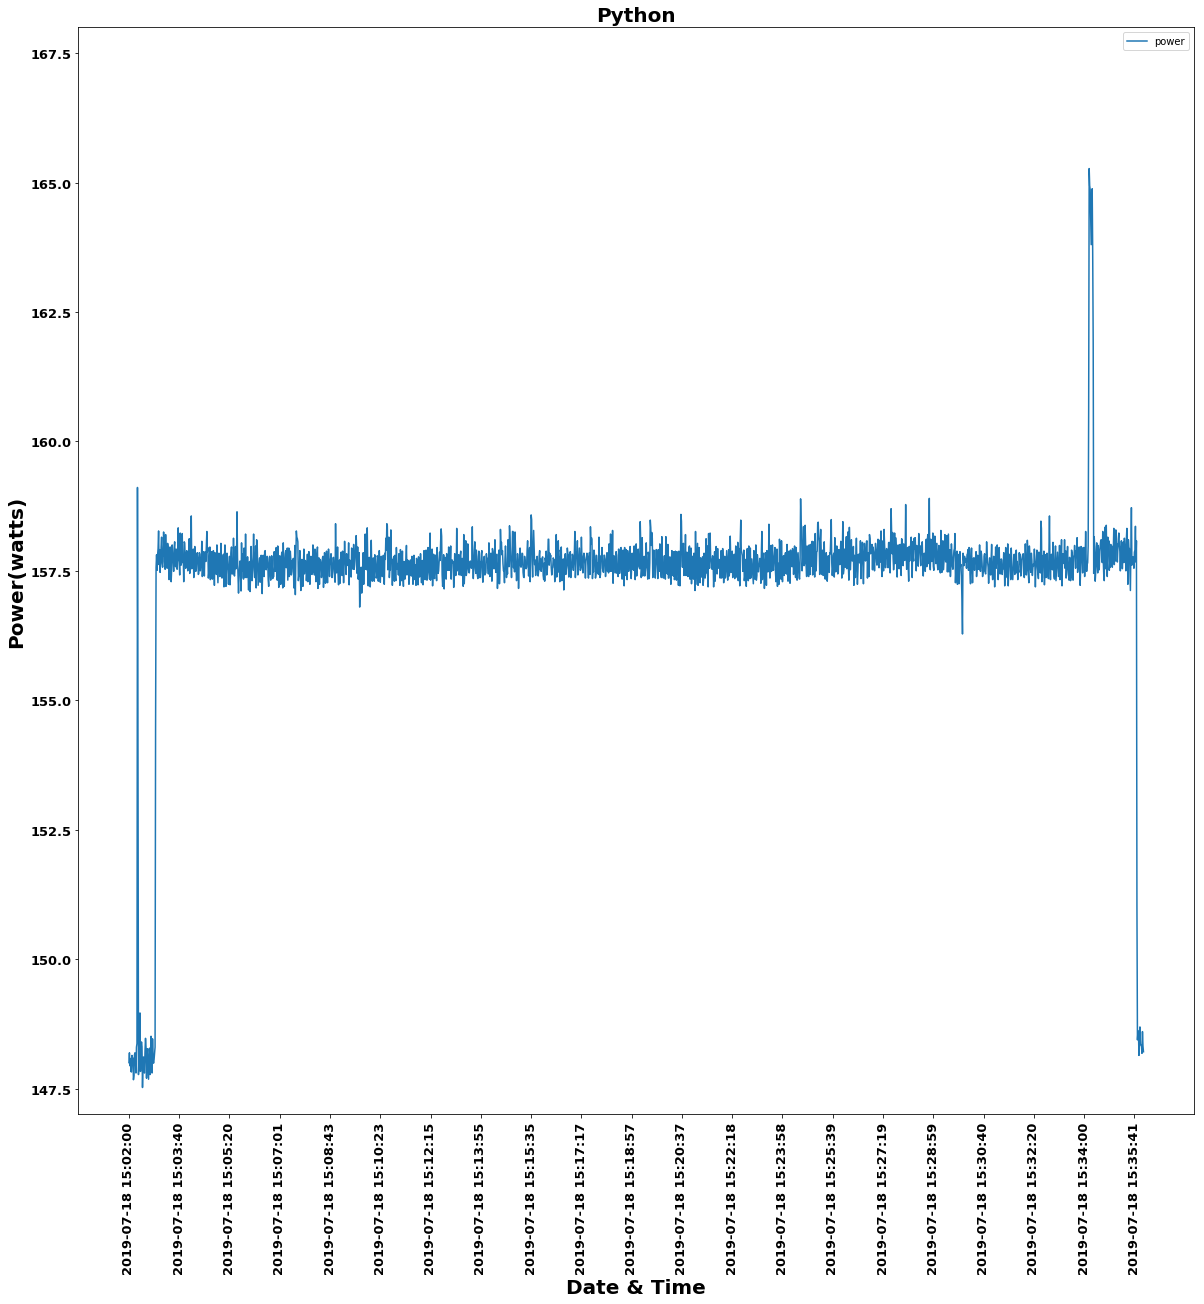

In [22]:
fig, ax = plt.subplots(figsize = (20,20))
ax.plot(py["IST"],py["power"])
plt.xticks(range(0,py.shape[0],100),rotation='vertical', fontsize = 13,fontweight = 'bold')
plt.yticks(fontsize = 13,fontweight = 'bold')
plt.xlabel("Date & Time", fontsize = 20,fontweight = 'bold')
plt.ylabel("Power(watts)", fontsize = 20,fontweight = 'bold')
plt.title("Python", fontsize = 20,fontweight = 'bold')
plt.ylim(147,168)
plt.legend()

plt.savefig('images/Python.png')

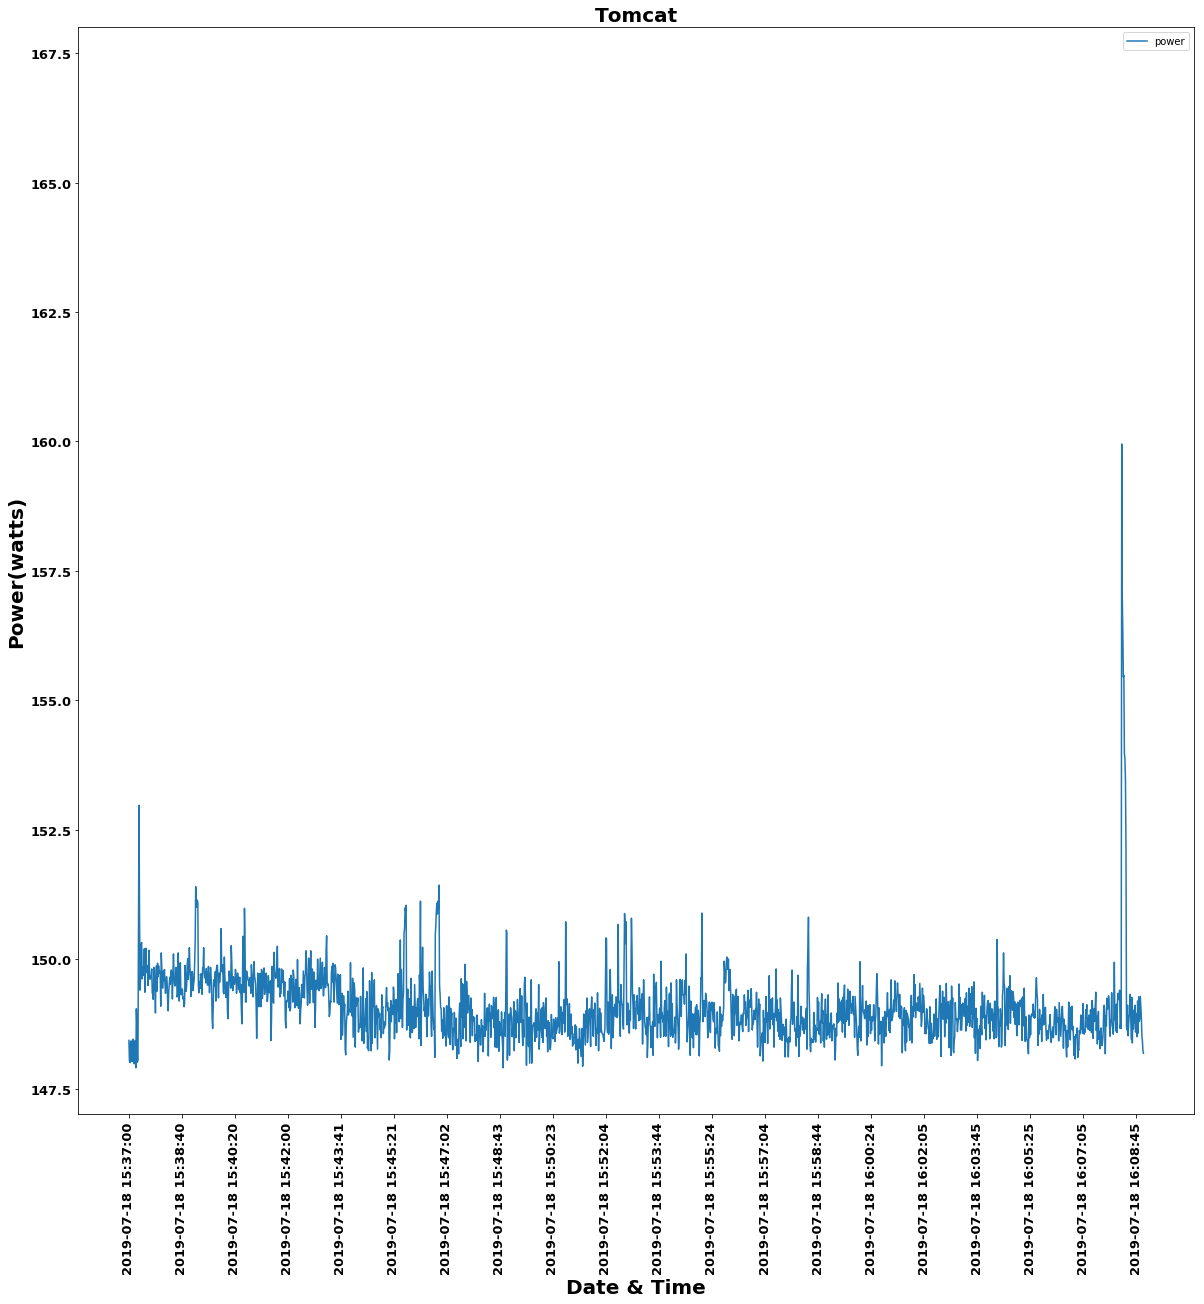

In [23]:
fig, ax = plt.subplots(figsize = (20,20))
ax.plot(tom["IST"],tom["power"])
plt.xticks(range(0,tom.shape[0],100),rotation='vertical', fontsize = 13,fontweight = 'bold')
plt.yticks(fontsize = 13,fontweight = 'bold')
plt.xlabel("Date & Time", fontsize = 20,fontweight = 'bold')
plt.ylabel("Power(watts)", fontsize = 20,fontweight = 'bold')
plt.title("Tomcat", fontsize = 20,fontweight = 'bold')
plt.ylim(147,168)
plt.legend()

plt.savefig('images/Tomcat.png')

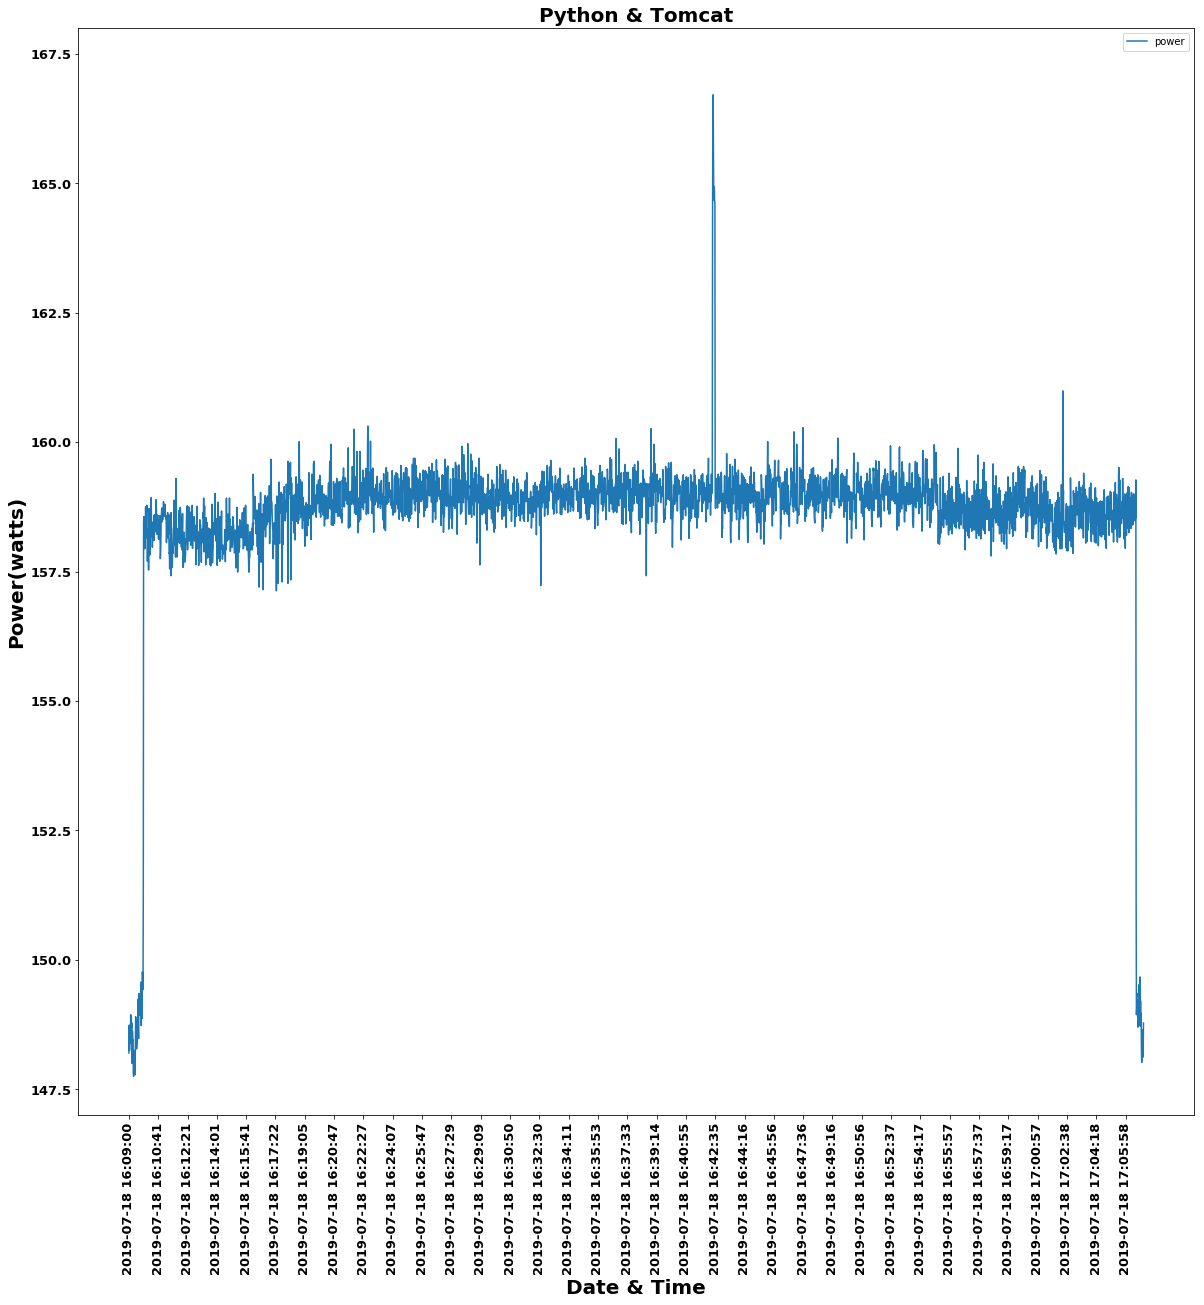

In [24]:
fig, ax = plt.subplots(figsize = (20,20))
ax.plot(pytom["IST"],pytom["power"])
plt.xticks(range(0,pytom.shape[0],100),rotation='vertical', fontsize = 13,fontweight = 'bold')
plt.yticks(fontsize = 13,fontweight = 'bold')
plt.xlabel("Date & Time", fontsize = 20,fontweight = 'bold')
plt.ylabel("Power(watts)", fontsize = 20,fontweight = 'bold')
plt.title("Python & Tomcat", fontsize = 20,fontweight = 'bold')
plt.ylim(147,168)
plt.legend()

plt.savefig('images/Python&Tomcat.png')

In [25]:
pymin=py.IST.min()
pymax=py.IST.max()

tommin=tom.IST.min()
tommax=tom.IST.max()

pytommin=pytom.IST.min()
pytommax=pytom.IST.max()

In [26]:
Fdata = pd.concat([py,tom,pytom], axis=0).reset_index(drop=True)

Fdata.index

Fd=Fdata.describe()

Fd=pd.DataFrame(Fd)

Fd.to_csv(r'summary/P_T&PT_Summary.csv')

Fd

,voltage,current,power,power_factor,frequency
count,7399.000000,7399.000000,7399.000000,7399.0,7399.000000
mean,120.044828,1.302091,155.812664,1.0,59.933086
std,0.165185,0.034993,4.277081,0.0,0.227526
min,119.510000,1.227000,147.520000,1.0,59.400000
25%,119.930000,1.253000,149.690000,1.0,59.700000
50%,120.040000,1.319000,157.910000,1.0,59.900000
75%,120.160000,1.327000,158.820000,1.0,60.100000
max,120.790000,1.391000,166.710000,1.0,60.600000


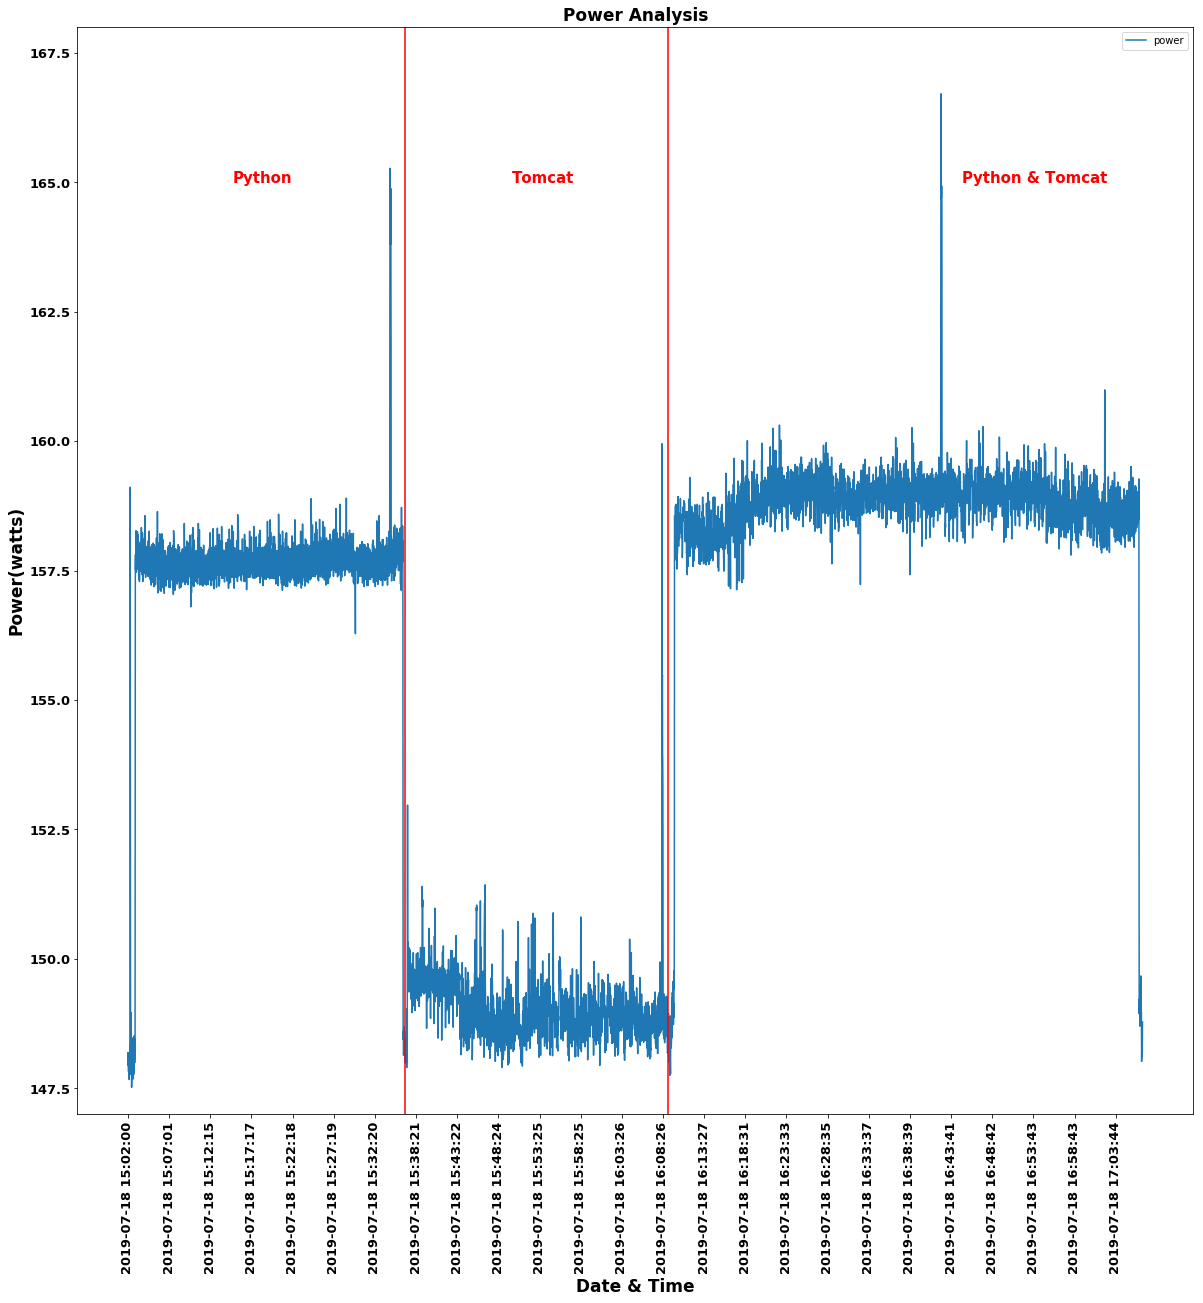

In [27]:
fig, ax = plt.subplots(figsize = (20,20))
ax.plot(Fdata["IST"],Fdata["power"])
plt.xticks(range(0,Fdata.shape[0],300),rotation='vertical', fontsize = 13,fontweight = 'bold')
plt.yticks(fontsize = 13,fontweight = 'bold')
plt.xlabel("Date & Time", fontsize = 17,fontweight = 'bold')
plt.ylabel("Power(watts)", fontsize = 17,fontweight = 'bold')
plt.title("Power Analysis", fontsize = 17,fontweight = 'bold')
plt.ylim(147,168)
plt.legend(fontsize=10)

xposition = [pymax,tommax]
for xc in xposition:
    plt.axvline(x=xc, color='red') 
    
style = dict(size=15, color='red',fontweight = 'bold')
ax.text('2019-07-18 15:15:00', 165, "Python", **style)
ax.text('2019-07-18 15:50:00', 165, "Tomcat", **style)
ax.text('2019-07-18 16:45:00', 165, "Python & Tomcat", **style)
    
plt.savefig('images/PowerAnalysis.png')